#Spotify Song Dataset Exploration

In this notebook, we explore a dataset of Spotify tracks and their audio features.
We’ll investigate questions like:


*   Are shorter songs more danceable?
*   Do energetic songs also feel happier?
*   How has average song duration changed over time?
*   How are features like tempo, energy, and valence distributed?
*   How have these features evolved across decades?






## Imports





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare the Data


In [ ]:
# Load dataset
df = pd.read_csv('/content/sample_data/tracks_features.csv')

We load the dataset, convert it into a faster Parquet format, and inspect its structure.

In [ ]:
# Convert to Parquet
df.to_parquet('/content/sample_data/tracks_features.parquet', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486524 entries, 0 to 486523
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                486524 non-null  object 
 1   name              486523 non-null  object 
 2   album             486524 non-null  object 
 3   album_id          486523 non-null  object 
 4   artists           486523 non-null  object 
 5   artist_ids        486523 non-null  object 
 6   track_number      486523 non-null  float64
 7   disc_number       486523 non-null  float64
 8   explicit          486523 non-null  object 
 9   danceability      486523 non-null  float64
 10  energy            486523 non-null  float64
 11  key               486523 non-null  float64
 12  loudness          486523 non-null  float64
 13  mode              486523 non-null  float64
 14  speechiness       486523 non-null  float64
 15  acousticness      486523 non-null  float64
 16  instrumentalness  48

## Are Shorter Songs More Danceable?

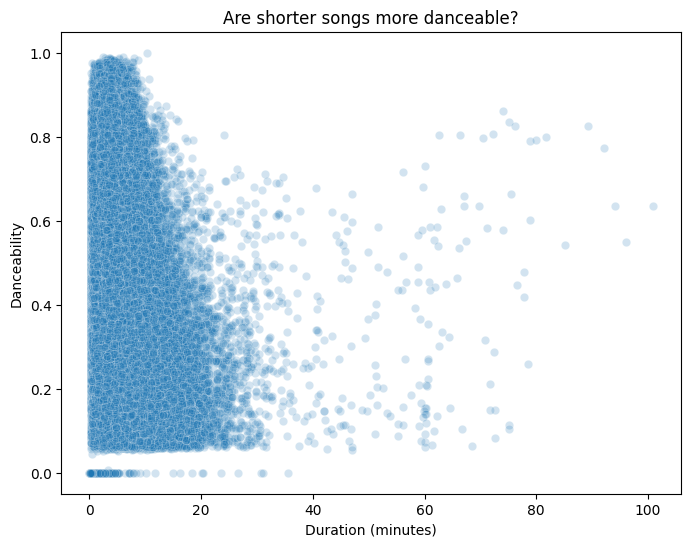

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='duration_min',
    y='danceability',
    alpha=0.2
)
plt.xlabel("Duration (minutes)")
plt.ylabel("Danceability")
plt.title("Are shorter songs more danceable?")
plt.show()



**Interpretation:**
The scatterplot shows a slight tendency for shorter tracks to have higher danceability.
However, the relationship is not very strong — we still see many long songs with high danceability.

## Do Energetic Songs Also Feel Happier?


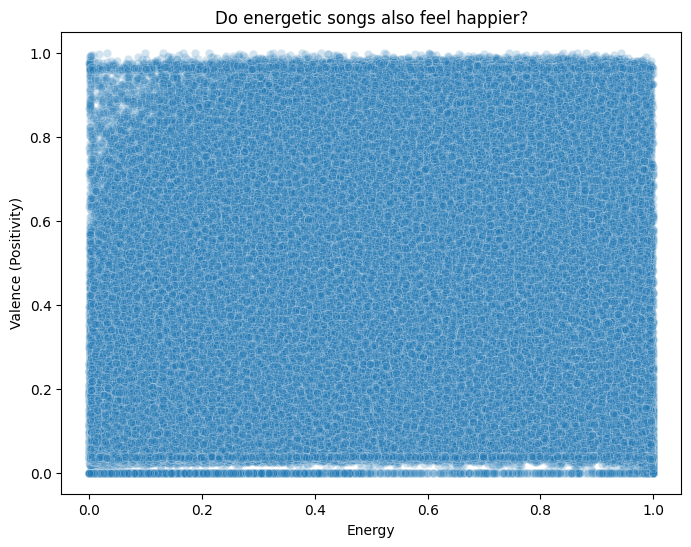

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='energy',
    y='valence',
    alpha=0.2
)
plt.xlabel("Energy")
plt.ylabel("Valence (Positivity)")
plt.title("Do energetic songs also feel happier?")
plt.show()


##How Has Song Duration Changed Over Time?

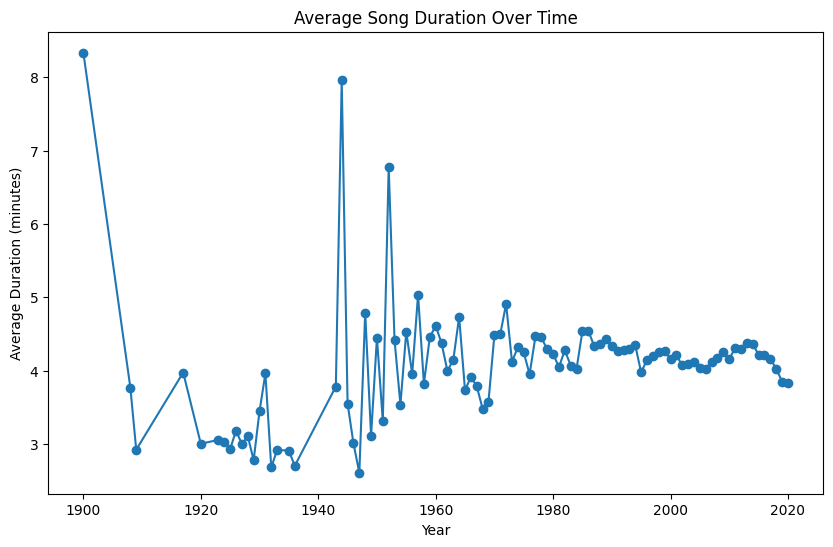

In [ ]:
yearly = df.groupby('year')['duration_min'].mean().dropna()

plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Song Duration Over Time")
plt.show()


**Interpretation:**
Song durations have fluctuated over time.
In recent decades, there’s a noticeable trend toward shorter songs, likely influenced by streaming platforms and changing listener habits.

## How Are Features Like Tempo, Energy, and Valence Distributed?

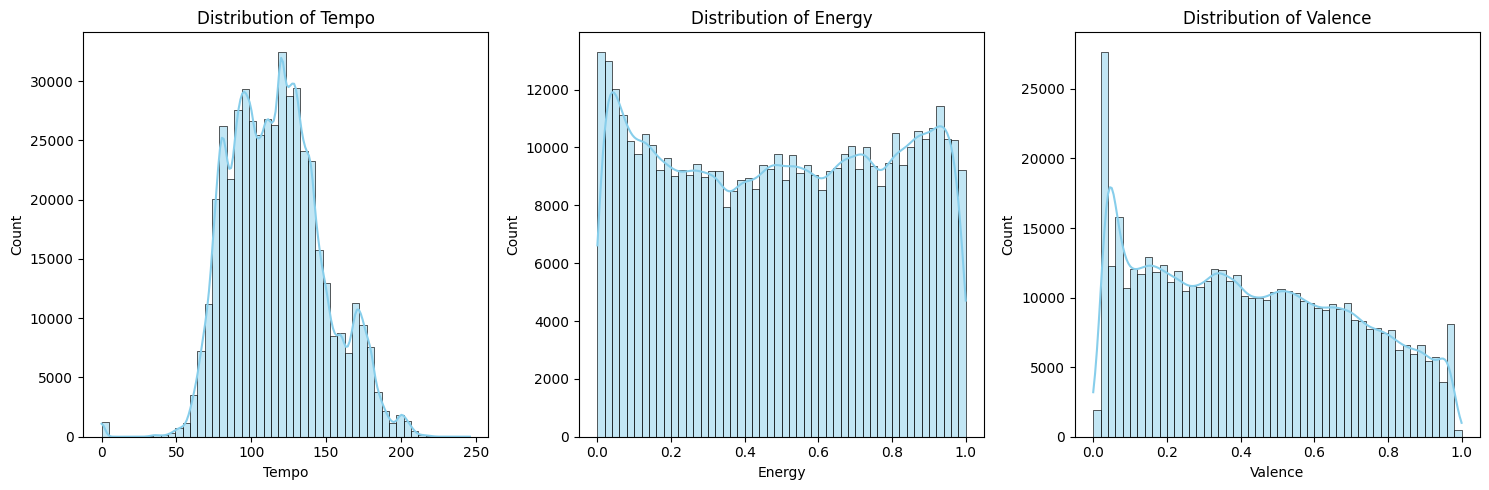

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to plot
features = ['tempo', 'energy', 'valence']

plt.figure(figsize=(15,5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    sns.histplot(df[feature].dropna(), bins=50, kde=True, color='skyblue')
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


**Interpretation:**

Tempo: Most songs cluster around 100–140 BPM, common for pop and dance tracks.

Energy: Many songs sit in the mid-to-high range, suggesting mainstream music favors lively tracks.

Valence: Distribution is more balanced — music spans both sad and happy moods.

## How Do Features Vary by Decade?

In [ ]:
# Create a decade column
df['decade'] = (df['year'] // 10) * 10


### Tempo by Decade

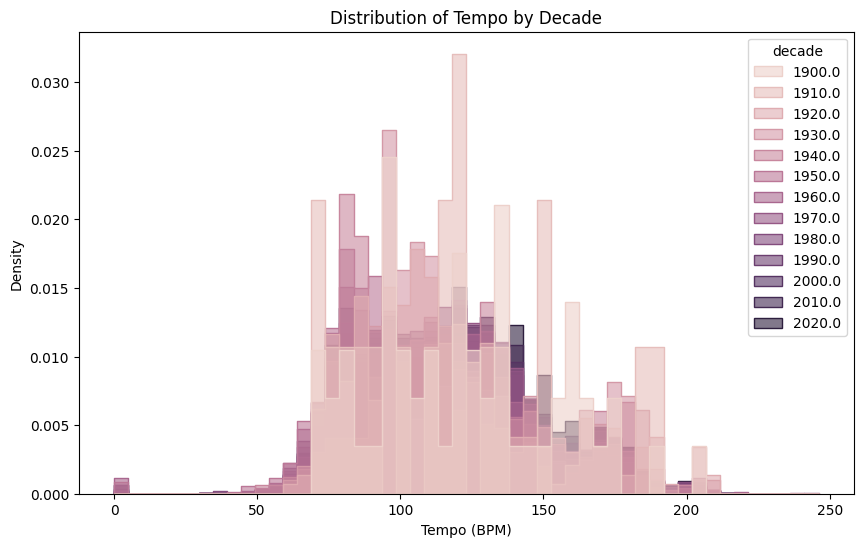

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='tempo',
    hue='decade',
    bins=50,
    element='step',   # outline curves
    stat='density',   # normalize for comparison
    common_norm=False,
    alpha=0.6
)
plt.title("Distribution of Tempo by Decade")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Density")
plt.show()


**Interpretation:**
Tempo distributions shift across decades — some eras leaned toward slower music, while others favored faster rhythms.

###Energy by Decade

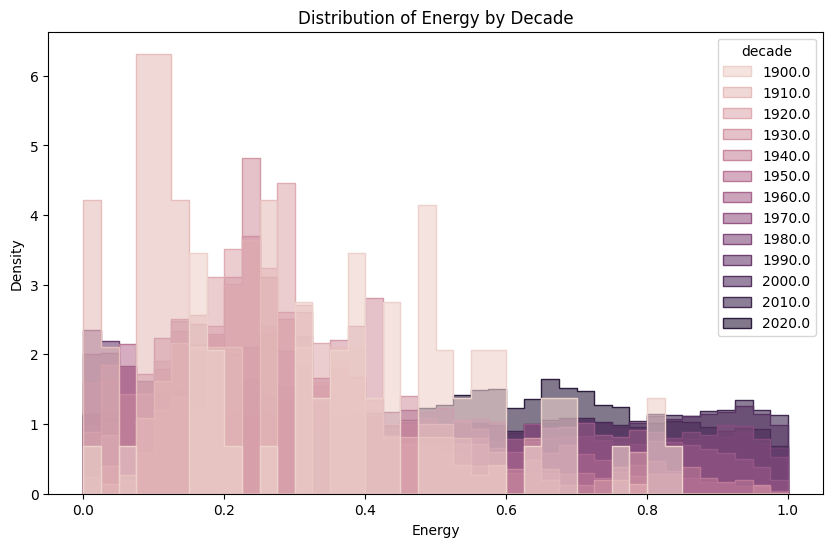

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='energy',
    hue='decade',
    bins=40,
    element='step',
    stat='density',
    common_norm=False,
    alpha=0.6
)
plt.title("Distribution of Energy by Decade")
plt.xlabel("Energy")
plt.ylabel("Density")
plt.show()


**Interpretation:**
Energy levels have varied — but many modern decades show a higher proportion of energetic songs, aligning with electronic and pop trends.

###Valence by Decade

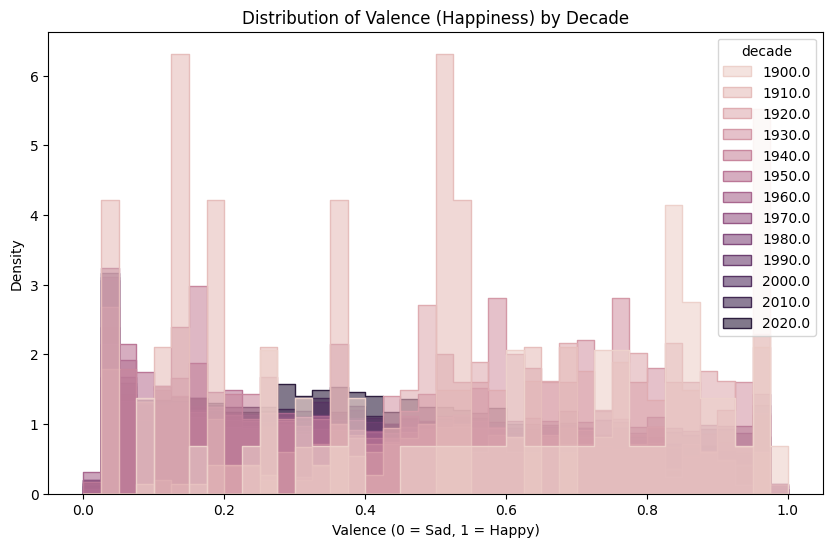

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='valence',
    hue='decade',
    bins=40,
    element='step',
    stat='density',
    common_norm=False,
    alpha=0.6
)
plt.title("Distribution of Valence (Happiness) by Decade")
plt.xlabel("Valence (0 = Sad, 1 = Happy)")
plt.ylabel("Density")
plt.show()


**Interpretation:**
Interestingly, valence distributions vary widely. Some decades favored happier songs, while others leaned toward sadder or moodier music.

## How Have Features Changed Across Decades?

In [ ]:
# Compute average per decade
decade_trends = df.groupby('decade')[['tempo', 'energy', 'valence']].mean().reset_index()
decade_trends

,decade,tempo,energy,valence
0,1900.0,122.510534,0.432257,0.672245
1,1910.0,116.422000,0.160849,0.362542
2,1920.0,116.890274,0.275672,0.656156
3,1930.0,121.298985,0.322312,0.645000
4,1940.0,114.203684,0.279623,0.396283
5,1950.0,108.210670,0.294678,0.396350
6,1960.0,111.303244,0.328491,0.424205
7,1970.0,115.928801,0.437060,0.489457
8,1980.0,115.965677,0.424041,0.451581
9,1990.0,114.892764,0.416202,0.424194


### Tempo Trend

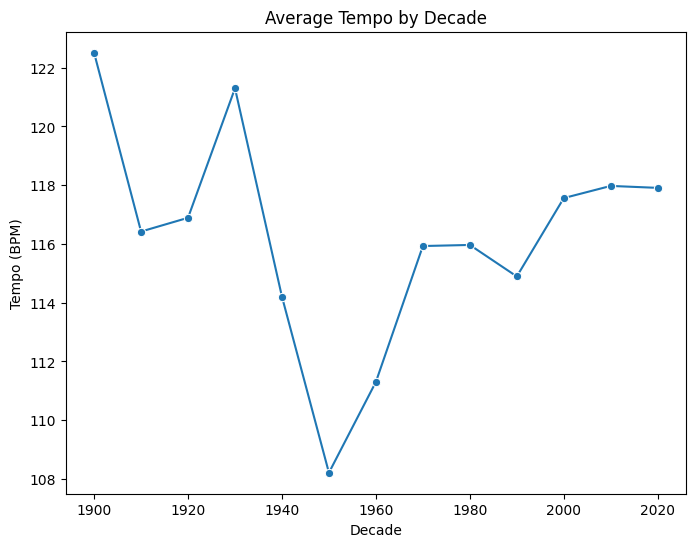

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=decade_trends, x='decade', y='tempo', marker='o')
plt.title("Average Tempo by Decade")
plt.xlabel("Decade")
plt.ylabel("Tempo (BPM)")
plt.show()


**Interpretation:**
Tempo has gone through ups and downs. Some decades saw faster average tempos, while others leaned slower — showing how musical tastes evolved.

###Energy Trend

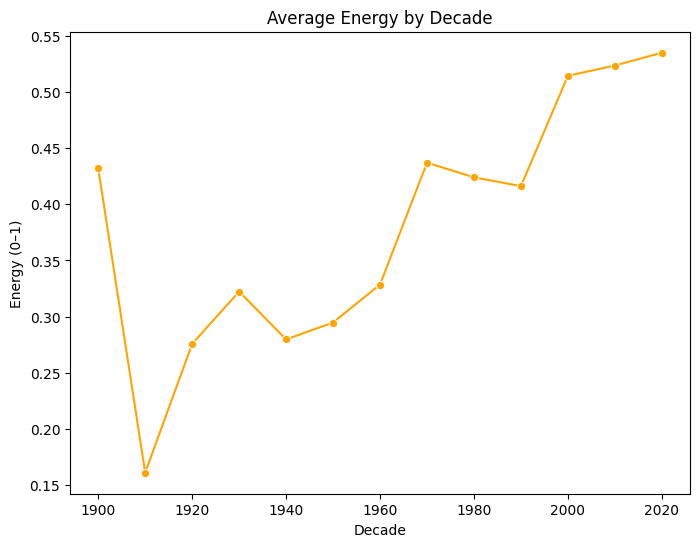

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=decade_trends, x='decade', y='energy', marker='o', color='orange')
plt.title("Average Energy by Decade")
plt.xlabel("Decade")
plt.ylabel("Energy (0–1)")
plt.show()


**Interpretation:**
Energy has generally increased over time, with modern decades showing consistently high-energy music.

### Valence Trend

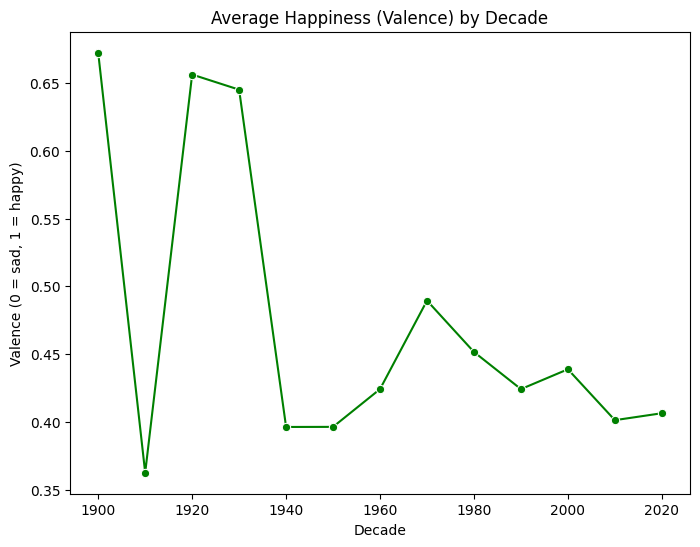

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=decade_trends, x='decade', y='valence', marker='o', color='green')
plt.title("Average Happiness (Valence) by Decade")
plt.xlabel("Decade")
plt.ylabel("Valence (0 = sad, 1 = happy)")
plt.show()

**Interpretation:**
Valence shows fluctuations — some decades were dominated by happy, upbeat music, while others leaned more toward melancholic or serious tones.